In [20]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
cancer = load_breast_cancer()

In [22]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [23]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [24]:
df = pd.DataFrame(cancer.data[:,0:2], columns=cancer.feature_names[0:2])

df['class'] = cancer.target

df.head

<bound method NDFrame.head of      mean radius  mean texture  class
0          17.99         10.38      0
1          20.57         17.77      0
2          19.69         21.25      0
3          11.42         20.38      0
4          20.29         14.34      0
..           ...           ...    ...
564        21.56         22.39      0
565        20.13         28.25      0
566        16.60         28.08      0
567        20.60         29.33      0
568         7.76         24.54      1

[569 rows x 3 columns]>

In [25]:
df.isnull().sum()

mean radius     0
mean texture    0
class           0
dtype: int64

In [26]:
df.groupby('class').count()

,mean radius,mean texture
class,,
0,212,212
1,357,357


Text(0.5, 1.0, 'Raw Data (Bfore)')

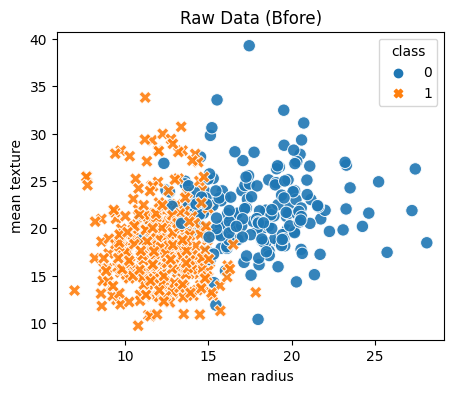

In [27]:
plt.figure(figsize=(5, 4))

sns.scatterplot(x='mean radius', y='mean texture', data=df, hue='class', style='class',
                alpha=0.9, edgecolor='w', s=80)

plt.title('Raw Data (Bfore)')

In [28]:
x = df.drop('class' ,axis=1)

y = df['class']

<h3>Feature Scaling</h3>

<h3>Min Max normalization</h3>

In [29]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

x_train = sc.fit_transform(x)

<h3>Standard Scaler</h3>

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x)

<h3>Robust Scaler</h3>

In [31]:
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()

x_sc = sc.fit_transform(x)

In [32]:
dfsc = pd.DataFrame(x_sc, columns=['mean radius', 'mean texture'])
dfsc['class'] = y

dfsc.head()

,mean radius,mean texture,class
0,1.132353,-1.502664,0
1,1.764706,-0.190053,0
2,1.549020,0.428064,0
3,-0.477941,0.273535,0
4,1.696078,-0.799290,0


<h3>KDE Plot</h3>

<Axes: title={'center': 'Before Scaling (Raw Data)'}, xlabel='mean radius', ylabel='Density'>

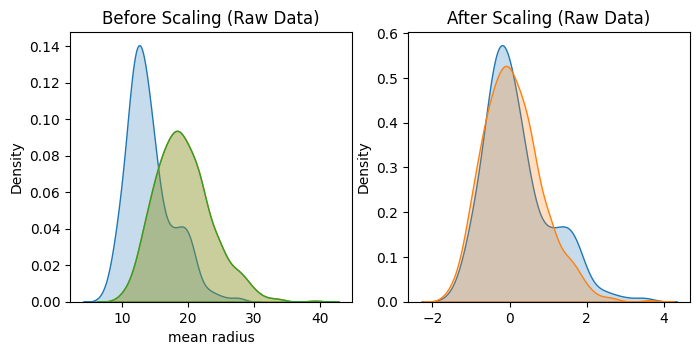

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3.5))

ax1.set_title("Before Scaling (Raw Data)")
sns.kdeplot(df['mean radius'], fill=True, ax=ax1)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

ax2.set_title("After Scaling (Raw Data)")
sns.kdeplot(x_sc[:, 0], fill=True, ax=ax2)
sns.kdeplot(x_sc[:, 1], fill=True, ax=ax2)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

Text(0.5, 1.0, 'Raw Data (After)')

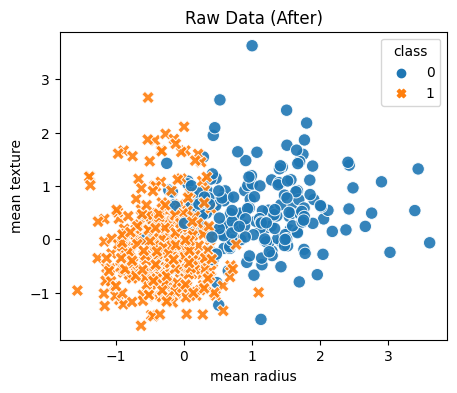

In [35]:
plt.figure(figsize=(5, 4))

sns.scatterplot(x='mean radius', y='mean texture', data=dfsc, hue='class', style='class',
                alpha=0.9, edgecolor='w', s=80)

plt.title('Raw Data (After)')